# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

In [1]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inferences)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inferences)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks # https://pytorch.org/docs/stable/nn.html

import matplotlib.pyplot as plt

In [3]:
torch.__version__

'2.2.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We will use a linear regression formula to make a straight line with *known* **parameters**.

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create a range of numbers
start = 0
end  = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = bias + weight * X # y = a + b*x

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important conceptsw in machine learning in general)

Let's create a training and test set with our data.

In [6]:
# Create a train/test split
train_split = int(0.8 * len(X))
#train_split # 40
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize!"

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plot training data, test data and compares predictions.
  """
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot  test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

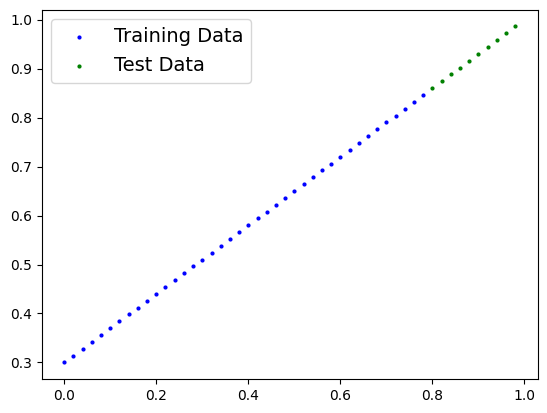

In [9]:
plot_predictions();

## 2. Build model

Our first PyTorch model

This is very exciting... let's do it

# [Learn from Python OOP](https://realpython.com/python3-object-oriented-programming/)


What are model does:
* Start with random values (wights and bias)
* Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias values used to create the data)

How does it do so?
Throught two main algorithms
1. Gradient descent : https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation : https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [10]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # -> https://pytorch.org/docs/stable/generated/torch.nn.Module.html
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

# PyTorch model buidling essential

* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation

# [PyTorch CheatSheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

### Check the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [11]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# model_0
# model_0.parameters()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict() # return dictionary of the parameters of our model (LinearRegressionModel)

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1236], dtype=torch.float64))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how it well ut predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# with our using `inference_mode()` method
y_preds = model_0(X_test)
y_preds

tensor([[0.3929],
        [0.3997],
        [0.4064],
        [0.4131],
        [0.4199],
        [0.4266],
        [0.4333],
        [0.4401],
        [0.4468],
        [0.4535]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [15]:
# Make predictions with model

'''
## You can also do something similar with `torch.no_grad(), however `torch.inference_mode()` if preferred.

with torch.no_grad():
  y_preds = model_0(X_test)

y_preds
'''

with torch.inference_mode(): # `torch.inference_mode()` disable to calculate or track `grad`
  y_preds = model_0(X_test)

y_preds


tensor([[0.3929],
        [0.3997],
        [0.4064],
        [0.4131],
        [0.4199],
        [0.4266],
        [0.4333],
        [0.4401],
        [0.4468],
        [0.4535]], dtype=torch.float64)

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?lang=en

In [16]:
# let's look at the `y_test`
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

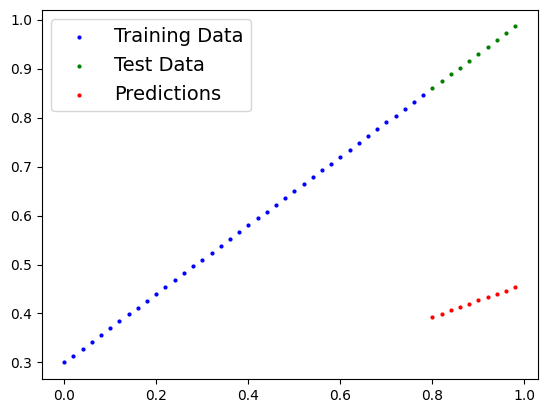

In [17]:
# visualize
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these maybe random) to some *known* parameters.

Or in other words, from a poor representation of the data to a better representation of the data.


One way to measure how poor or how wrong your models predictions are is to use a [**loss functions**](https://pytorch.org/docs/stable/nn.html#loss-functions)

* Note: Loss function maybe also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.


Things we need to train::

* [**Loss Function:**](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss) A function to measure how wrong your model predictions are to the ideal outputs, lower is better.

* [**Optimizer:**](https://pytorch.org/docs/stable/optim.html) Takes into account the loss of a model and adjusts the model's parameter's (e.g. weight and bias in our case) to improve the `loss function`.
  * `params`: the model parameters you'd like to optimize of example `params=model_0.parameters()`
  * `lr` (learning rate): the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [19]:
# Check out our model's parameters (a parameters is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1236], dtype=torch.float64))])

#### Extra Curriculum
**Reading** the documentation:
* https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
* https://pytorch.org/docs/stable/optim.html

* Note:
  * the small of the learning rate (lr), the small of the change in parameter
  * the larger of the learning rate (lr), the larger of the change in parameter

In [20]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent) #https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.01) # lr = learning rate = possibly the most important hyperparameter you can set


**Q:** Which loss function and optimizer should i use?

**A:** This will problem specific. But with experience, you will get an idea of what works and what doesn't with yoour particular problem set.

For examle, for a Regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make some predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation** - https://www.youtube.com/watch?v=tIeHLnjs5U8)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent** - https://www.youtube.com/watch?v=IHZwWFHWa-w)

In [21]:
list(model_0.parameters()) # in the model we build future, likely be set automatically rather than you setting them explicitly, like we've done when you create `model_0`

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [22]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyper parameter because we've set it ourselves )
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that requires graidents to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calulcate the loos
  loss = loss_fn(y_pred, y_train) # torch.L1Loss(input, target)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Performn backpropagation on the loss wioth respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizert (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop, so... we have to zero them in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # `eval()` sets the PyTorch model to evaluation mode, disabling operations like dropout, useful for inference and testing. This method plays a pivotal role in ensuring consistent and reliable model behavior during inference and testing.

print(model_0.state_dict())


Loss: 0.31810468919973606
OrderedDict([('weights', tensor([0.3406], dtype=torch.float64)), ('bias', tensor([0.1336], dtype=torch.float64))])


In [23]:
'''
#### practice

epochs = 10
for epoch in range(epochs):
  # set the model in training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grid
  optimizer.zero_grad()

  # 4. backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
'''

'\n#### practice\n\nepochs = 10\nfor epoch in range(epochs):\n  # set the model in training mode\n  model_0.train()\n\n  # 1. Forward pass\n  y_pred = model_0(X_train)\n\n  # 2. Calculate the loss\n  loss = loss_fn(y_pred, y_train)\n\n  # 3. Optimizer zero grid\n  optimizer.zero_grad()\n\n  # 4. backward\n  loss.backward()\n\n  # 5. Optimizer step\n  optimizer.step()\n\n  # Testing\n  model_0.eval()\n'

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406], dtype=torch.float64)),
             ('bias', tensor([0.1336], dtype=torch.float64))])

In [25]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

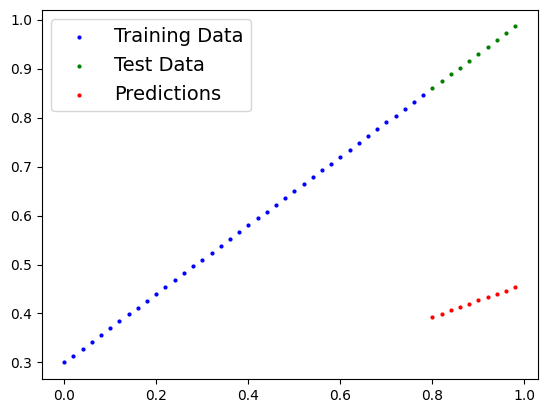

In [26]:
plot_predictions(predictions=y_preds)

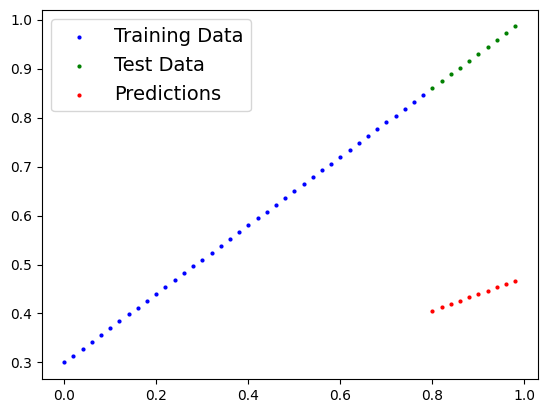

In [27]:
plot_predictions(predictions=y_preds_new)

### Practice

In [28]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
  # set the model in training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  print(f"Loss: {loss}")

  # 3. Optimizer zero grid
  optimizer.zero_grad()

  # 4. backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout [https://pytorch.org/docs/stable/nn.html#dropout-layers] / batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calulate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())

Loss: 0.3065836892633715
Epoch: 0 | Loss: 0.3065836892633715 | Test loss: 0.47281751655167287
OrderedDict([('weights', tensor([0.3445], dtype=torch.float64)), ('bias', tensor([0.1436], dtype=torch.float64))])
Loss: 0.29506268932700686
Loss: 0.2835416893906423
Loss: 0.2720206894542777
Loss: 0.260499689517913
Loss: 0.24897868958154845
Loss: 0.23745768964518382
Loss: 0.22593668970881922
Loss: 0.2144156897724546
Loss: 0.20289468983609
Loss: 0.19137368989972536
Epoch: 10 | Loss: 0.19137368989972536 | Test loss: 0.33810751690583596
OrderedDict([('weights', tensor([0.3835], dtype=torch.float64)), ('bias', tensor([0.2436], dtype=torch.float64))])
Loss: 0.1798526899633608
Loss: 0.16833169002699616
Loss: 0.1568106900906316
Loss: 0.14528969015426693
Loss: 0.13376869021790233
Loss: 0.12224769028153773
Loss: 0.11090599338784712
Loss: 0.10080097078236294
Loss: 0.09230156513269397
Loss: 0.08485211509121593
Epoch: 20 | Loss: 0.08485211509121593 | Test loss: 0.2106111172591713
OrderedDict([('weights', 

In [29]:
# predictioons

with torch.inference_mode():
  y_pred_new_practice = model_0(X_test)

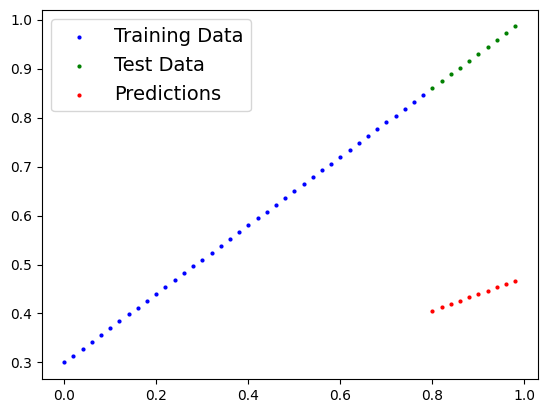

In [30]:
# old
plot_predictions(predictions=y_preds_new)

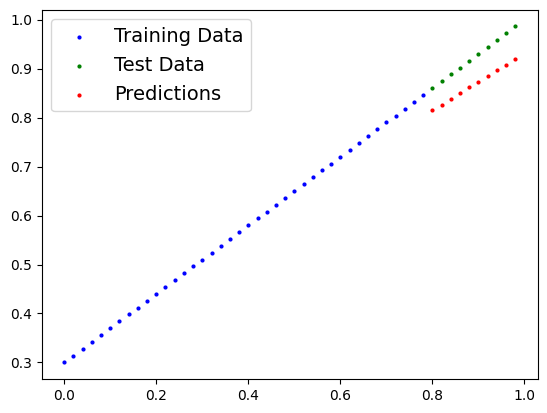

In [31]:
# new prediction with 100 epochs
plot_predictions(predictions=y_pred_new_practice)

In [32]:
# practice with 150 epochs

torch.manual_seed(42)
epochs = 150
for epoch in range(epochs):
  # set the model in training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  print(f"Loss: {loss}")

  # 3. Optimizer zero grid
  optimizer.zero_grad()

  # 4. backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout [https://pytorch.org/docs/stable/nn.html#dropout-layers] / batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calulate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())

Loss: 0.023915242221879185
Epoch: 0 | Loss: 0.023915242221879185 | Test loss: 0.0553284193632537
OrderedDict([('weights', tensor([0.5827], dtype=torch.float64)), ('bias', tensor([0.3491], dtype=torch.float64))])
Loss: 0.023571840754178598
Loss: 0.023226232251165997
Loss: 0.02288664078763132
Loss: 0.022537640805468016
Loss: 0.022201022296068844
Loss: 0.02185244083892074
Loss: 0.021512012325355673
Loss: 0.021167240872373465
Loss: 0.020823002354642482
Loss: 0.02048204090582621
Epoch: 10 | Loss: 0.02048204090582621 | Test loss: 0.04705601961722454
OrderedDict([('weights', tensor([0.5998], dtype=torch.float64)), ('bias', tensor([0.3421], dtype=torch.float64))])
Loss: 0.0201339923839293
Loss: 0.019796840939278942
Loss: 0.01944784095711562
Loss: 0.019108782428832148
Loss: 0.018762640990568354
Loss: 0.018419772458118967
Loss: 0.01807744102402109
Loss: 0.017730762487405776
Loss: 0.017392241057473824
Loss: 0.017043241075310512
Epoch: 20 | Loss: 0.017043241075310512 | Test loss: 0.038783619871195

In [33]:
# make some predictions
with torch.inference_mode():
  y_pred_150_epochs = model_0(X_test)

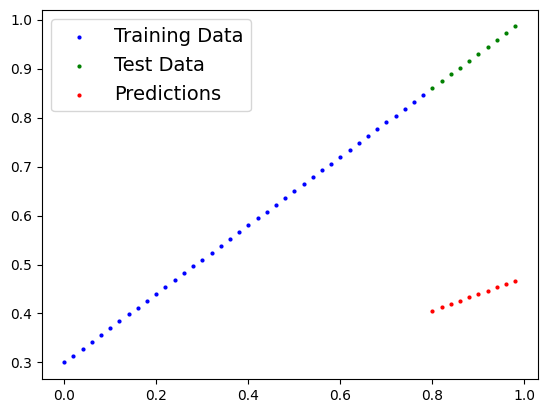

In [34]:
# 10 epochs
plot_predictions(predictions=y_preds_new)

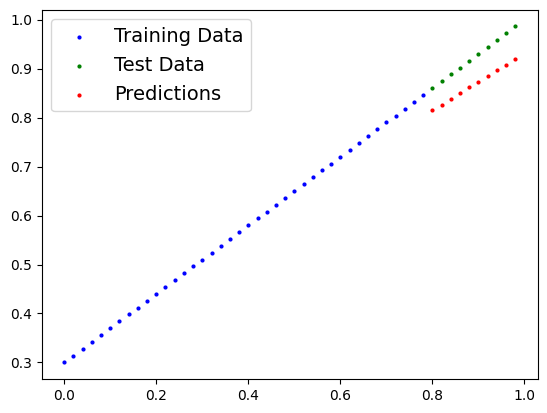

In [35]:
# 100 epochs plot
plot_predictions(predictions=y_pred_new_practice)

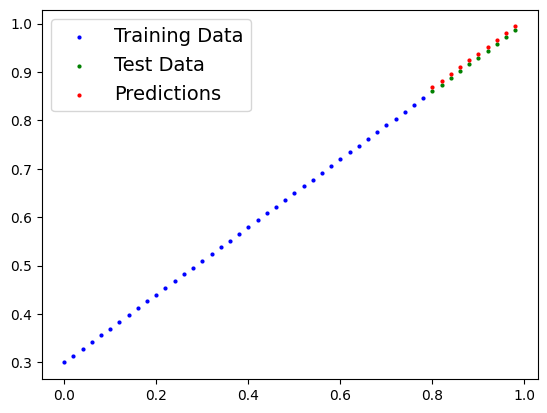

In [36]:
plot_predictions(predictions=y_pred_150_epochs)

In [37]:
# practice with 150 epochs

torch.manual_seed(42)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # set the model in training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #print(f"Loss: {loss}")

  # 3. Optimizer zero grid
  optimizer.zero_grad()

  # 4. backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout [https://pytorch.org/docs/stable/nn.html#dropout-layers] / batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calulate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.009020704331909797 | Test loss: 0.005175121018517459
OrderedDict([('weights', tensor([0.6947], dtype=torch.float64)), ('bias', tensor([0.2996], dtype=torch.float64))])
Epoch: 10 | Loss: 0.009020704331909797 | Test loss: 0.005175121018517459
OrderedDict([('weights', tensor([0.6947], dtype=torch.float64)), ('bias', tensor([0.2996], dtype=torch.float64))])
Epoch: 20 | Loss: 0.009020704331909797 | Test loss: 0.005175121018517459
OrderedDict([('weights', tensor([0.6947], dtype=torch.float64)), ('bias', tensor([0.2996], dtype=torch.float64))])
Epoch: 30 | Loss: 0.009020704331909797 | Test loss: 0.005175121018517459
OrderedDict([('weights', tensor([0.6947], dtype=torch.float64)), ('bias', tensor([0.2996], dtype=torch.float64))])
Epoch: 40 | Loss: 0.009020704331909797 | Test loss: 0.005175121018517459
OrderedDict([('weights', tensor([0.6947], dtype=torch.float64)), ('bias', tensor([0.2996], dtype=torch.float64))])
Epoch: 50 | Loss: 0.009020704331909797 | Test loss: 0.0051751

In [38]:
loss_values, test_loss_values

([tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, grad_fn=<MeanBackward0>),
  tensor(0.0090, dtype=torch.float64, gr

In [39]:
# convert to numpy, because matplotlib only works with numpy
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy())

array([0.0090207, 0.0090207, 0.0090207, 0.0090207, 0.0090207, 0.0090207,
       0.0090207, 0.0090207, 0.0090207, 0.0090207, 0.0090207, 0.0090207,
       0.0090207, 0.0090207, 0.0090207, 0.0090207, 0.0090207, 0.0090207,
       0.0090207, 0.0090207])

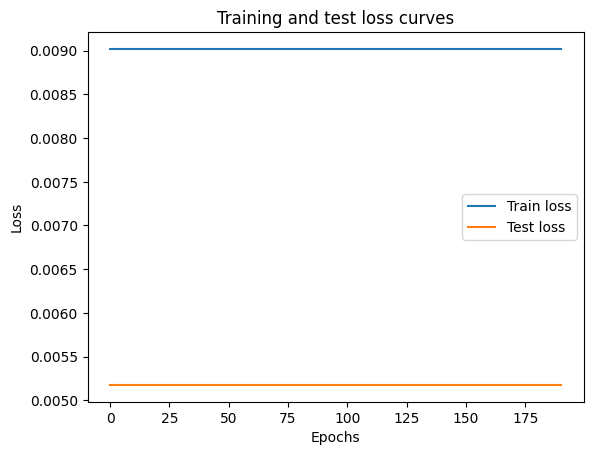

In [40]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [41]:
with torch.inference_mode():
  y_pred_200_epochs = model_0(X_test)

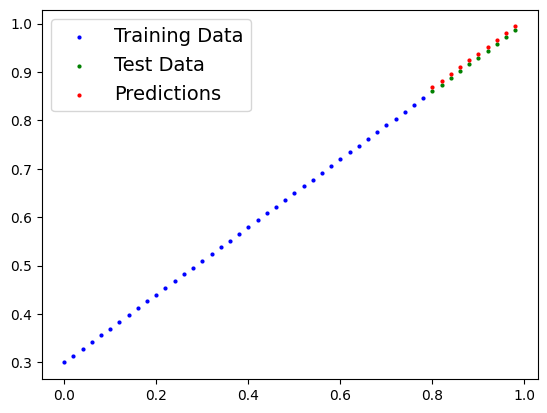

In [42]:
plot_predictions(predictions=y_pred_200_epochs)

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in [Python's pickle](https://docs.python.org/3/library/pickle.html) format
2. `torch.load()` - allows you to load a PyTorch object
3. `torch.nn.Module.load_state-dict()` - this allows to load a model's saved state dictionary

In [43]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6986], dtype=torch.float64)),
             ('bias', tensor([0.3096], dtype=torch.float64))])

In [44]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

#### Extra curriculum
1. Python pickle: https://docs.python.org/3/library/pickle.html
2. PyTorch Saving and Loading Models: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [45]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2.  Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # A common PyTorch convention is to save models using either a `.pt` or `.pth` file extension.
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH) # https://pytorch.org/docs/stable/generated/torch.save.html

Saving model to: models/01_pytorch_workflow_model_0.pth


In [46]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 May 12 14:17 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [47]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6986], dtype=torch.float64)),
             ('bias', tensor([0.3096], dtype=torch.float64))])

In [48]:
# # To Load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# random values of our model
#loaded_model_0.state_dict()

# Load the saved state_dict of model_0 (this will update the new instance with updated partamters)
loaded_model_0 .load_state_dict(torch.load(f=MODEL_SAVE_PATH)) # https://pytorch.org/docs/stable/generated/torch.load.html


<All keys matched successfully>

In [49]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6986], dtype=torch.float64)),
             ('bias', tensor([0.3096], dtype=torch.float64))])

In [50]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0 (X_test)
loaded_model_preds

tensor([[0.8684],
        [0.8824],
        [0.8964],
        [0.9103],
        [0.9243],
        [0.9383],
        [0.9523],
        [0.9662],
        [0.9802],
        [0.9942]], dtype=torch.float64)

In [51]:
# Compare loaded model pred with original model preds
y_pred_200_epochs == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [52]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch verison
torch.__version__

'2.2.1+cu121'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU

In [53]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


# 6.1 Data

In [54]:
# Create some data using linear regression formula y=weigh * X + bias
weight = 0.7
bias = 0.3

# Create range of values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # withour unsqueeze error will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [55]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [56]:
# Create a function for plot predictions (Plot training data, test data and compares predictions.)
def plot_prediction (
                      train_data= X_train,
                      train_labels= y_train,
                      test_data= X_test,
                      test_labels= y_test,
                      predictions= None
                    ):
  # Plot training data -> blue color
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data -> gree color
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Check if there are predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

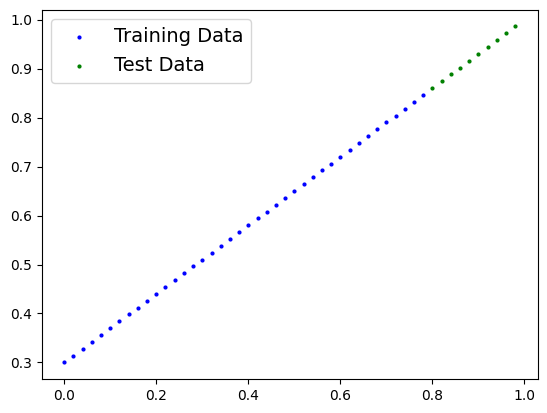

In [57]:
plot_prediction()

## 6.2. Create a PyTorch Linear Model


In [58]:
# Create a linear mode lby subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creatying the model paramters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [59]:
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [60]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [61]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [62]:
# Setpu loss function
loss_function = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                              lr=0.01, )

In [63]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_function(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    # calculate the loss
    test_loss = loss_function(test_pred, y_test)

  # Print our what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [64]:
# evaluating
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [65]:
weight, bias

(0.7, 0.3)

In [66]:
# Turn model into evaluation mode
model_1.eval()
# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

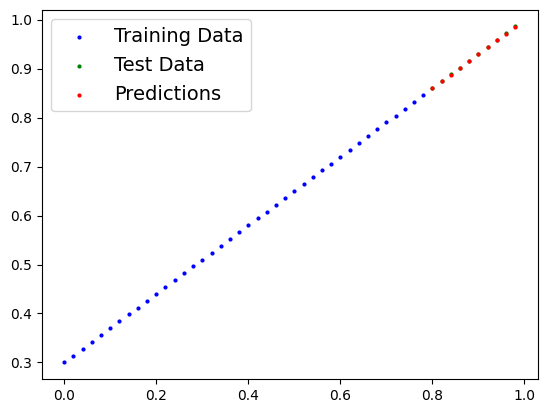

In [67]:
# Check out our model predictions visually
plot_prediction(predictions=y_preds.cpu())

### 6.5 Saving and Loading model

In [68]:
from pathlib import Path

# Create directory for saving the model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)

# Create file name of our model and create save path for our model
MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow.pth


In [69]:
# loading the saved model
# create instance of our model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [71]:
# loading the saved model state_dict() to the new instance we created

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# check the parameters, loaded and original model
loaded_model_1.state_dict(), model_1.state_dict()

(OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]),
 OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]))

In [74]:
# Put the model to device
loaded_model_1.to(device)
# check the device
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [76]:
# Evaluate the model
loaded_model_1.eval()

# predictions
with torch.inference_mode():
  loaded_model_1_y_pred = loaded_model_1(X_test)

loaded_model_1_y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [78]:
# check if loaded and original model predictions are same
loaded_model_1_y_pred == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

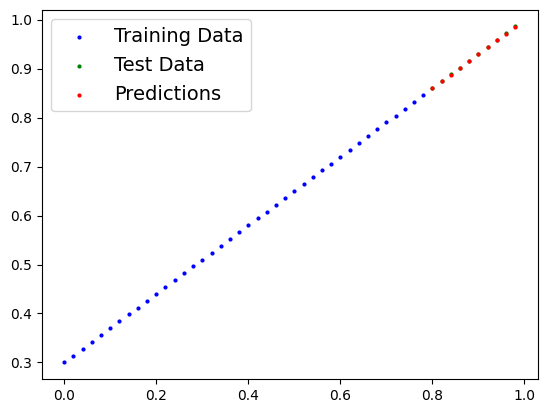

In [80]:
# plot the result for visualize
plot_prediction(predictions=loaded_model_1_y_pred.cpu())